In [186]:
import pandas as pd
import seaborn
import numpy as np 
import scanpy
import scipy.stats.mstats as stats


In [346]:
# TODO: Implement Q3 Normalization

a = [[8,7,5,3], [5,4,9,2]]

quantiles = [0 for i in range(len(a))]

j = 0 
for i in a:
    quantiles[j] = np.quantile(i, 0.75)
    j = j + 1
    
    
geomean = stats.gmean(quantiles)

for i in range(len(a)):
    a[i] = a[i] / quantiles[i] * geomean
    
    
print(a)


[array([7.27774122, 6.36802357, 4.54858826, 2.72915296]), array([5.49621082, 4.39696865, 9.89317947, 2.19848433])]


In [169]:
data = pd.read_excel("sunny_bioqc.xlsx", sheet_name = "TargetCountMatrix")

/Users/gabrielf/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [117]:
data

,TargetName,10233 4 | 001 | Segment 1,10233 4 | 001 | Segment 2,10233 4 | 002 | Segment 1,10233 4 | 003 | Segment 1,10233 4 | 004 | Segment 1,10233 4 | 004 | Segment 2,10233 4 | 005 | Segment 1,10233 4 | 005 | Segment 2,10233 4 | 006 | Segment 2,...,98016 2 | 007 | Segment 2,98016 2 | 009 | Segment 1,98016 2 | 010 | Segment 1,98016 2 | 013 | Segment 1,98016 2 | 014 | Segment 1,98016 2 | 016 | Segment 1,98016 2 | 016 | Segment 2,98016 2 | 017 | Segment 2,98016 2 | 018 | Segment 1,98016 2 | 019 | Segment 1
0,TSHR,43.290853,1.000000,77.337621,35.222902,78.362443,12.481631,38.964019,17.520838,69.315881,...,98.794280,7.974842,39.173398,1.643752,19.612254,7.472334,156.152294,259.869611,6.543894,6.622682
1,TP73,237.597490,1.000000,369.995119,234.084139,277.431365,18.347247,300.781838,23.939277,71.831797,...,189.269767,15.949833,42.416161,2.626528,25.909338,8.164933,424.557785,304.238109,7.413949,7.630728
2,C1QA,49.261230,2.047673,86.931967,39.714689,112.628188,183.703866,79.533188,227.491863,323.845233,...,207.181985,86.705703,320.981750,3.844642,84.374185,67.842572,284.366728,341.394327,93.282146,53.468140
3,MMP1,44.069614,1.148698,76.887808,28.230009,73.197312,14.545833,44.336564,19.258836,63.953480,...,97.125112,10.846886,36.972949,2.371441,23.212983,8.040219,155.829272,249.481924,4.584426,8.887194
4,ICAM3,51.867719,1.000000,78.163035,32.671071,80.603515,23.519698,48.365075,70.294488,181.224219,...,110.606718,18.690613,68.236107,1.888175,39.702997,12.684094,165.234468,274.246418,12.954211,11.360022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,POU2F2,37.101778,1.000000,67.445402,30.912389,74.536604,15.426327,46.473241,50.601450,132.770927,...,88.498551,17.829446,41.694970,1.933182,36.035331,10.430841,146.757717,232.653247,10.225663,9.287969
1808,PSEN1,81.165798,1.148698,134.997321,73.177140,128.187628,24.373403,108.551503,42.029286,114.406819,...,129.138839,16.261868,48.693396,2.459509,33.384507,10.015949,251.358270,293.483892,6.931448,8.568966
1809,VEGFB,133.636952,1.000000,240.754000,140.128755,197.644258,29.276040,171.269997,53.126705,132.899064,...,173.135484,16.494489,52.831313,2.951546,37.054312,14.389390,318.464933,353.855708,12.948524,12.155110
1810,CD99,45.967717,1.189207,72.619467,39.327220,75.978523,34.778519,53.480521,87.281605,201.251989,...,110.023753,21.548259,80.065306,3.130169,48.537770,17.320508,207.648897,412.853727,12.466062,16.462022


In [171]:
spdf = pd.melt(data, id_vars='TargetName', value_vars=data.keys())

In [183]:
spdf = spdf.rename(columns = \
                   {"TargetName" : "Gene", "variable": "ROI", "value" : "Counts"})

AttributeError: 'AxesSubplot' object has no attribute 'show'

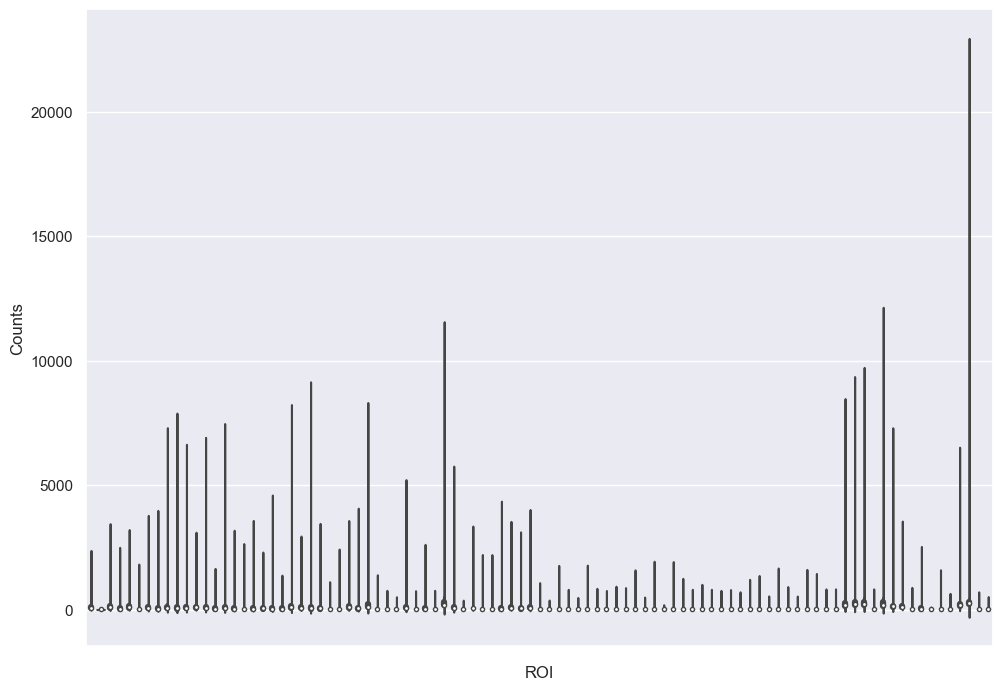

In [ ]:
a = seaborn.violinplot(data = spdf, x = "ROI", y = "Counts")


a.set(xticklabels=[]) 

a.show()







The distribution of counts across each ROI. Clearly, the distribution of gene counts vary wildly between each sample. This suggests that data normalization is necessary for proper statistical analysis of the data. 

In [318]:
segmentProperties = pd.read_excel("sunny_bioqc.xlsx", sheet_name = "SegmentProperties")
targetCountMatrix = pd.read_excel("sunny_bioqc.xlsx", sheet_name = "TargetCountMatrix")

/Users/gabrielf/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/gabrielf/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [222]:
print(len(segmentProperties['AOISurfaceArea']))

print(segmentProperties.keys())



indexes = []
index = 0

for i in segmentProperties['AOISurfaceArea'] < 5000:
    if i:
        indexes.append(index)
    index += 1
    
#segmentProperties = segmentProperties.drop(indexes, axis=0)
    
    
print(sum(segmentProperties['AOISurfaceArea'] < 5000))

print(len(segmentProperties))



95
Index(['SlideName', 'ScanLabel', 'ROILabel', 'SegmentLabel',
       'SegmentDisplayName', 'Segment 1', 'CK+', 'MCC', '10233', 'Segment 2',
       'CD45', 'Skin', '101287', '107466', '98016', 'QCFlags',
       'AOISurfaceArea', 'AOINucleiCount', 'ROICoordinateX', 'ROICoordinateY',
       'RawReads', 'AlignedReads', 'DeduplicatedReads', 'TrimmedReads',
       'StitchedReads', 'SequencingSaturation', 'SequencingSetID', 'UMIQ30',
       'RTSQ30', 'GeoMxNgsPipelineVersion', 'ROIID', 'SegmentID', 'ScanWidth',
       'ScanHeight', 'ScanOffsetX', 'ScanOffsetY',
       'LOQ (Cancer Transcriptome Atlas)'],
      dtype='object')
2
95


In [220]:
def DropSurfaceArea(data, threshold):
    
    indexes = []
    index = 0

    for i in data['AOISurfaceArea'] < threshold:
        if i:
            indexes.append(index)
        index += 1
    
    dropped = data.drop(indexes, axis=0)
    
    return(dropped, indexes)
    
    

In [253]:
# TODOS:

# Plot average signal to noise to noise across each gene
# Plot total signal to noise ratio across each gene


# Use Matrix data

# drop 

print(indexes)

    # get sample names 
    
sampleNames = ["" for i in range(len(indexes))]

print(sampleNames)

for i in range(len(indexes)):
    ind = indexes[i]
    sampleNames[i] = segmentProperties['SegmentDisplayName'][ind]

print(sampleNames)

    # Now drop those from the target count matrix 
    
print(targetCountMatrix.shape)
    
targetCountMatrix = targetCountMatrix.drop(sampleNames, axis = 1)

print(targetCountMatrix.shape)





[1, 68]
['', '']
['10233 4 | 001 | Segment 2', '107466 2 | 014 | Segment 2']
(1812, 96)
(1812, 94)


In [319]:
# Compute signal to noise 

genes = targetCountMatrix["TargetName"]

print(genes)

noiseIndex = np.where(genes == "Negative Probe")[0][0]

print(noiseIndex)

noiseAcrossSamples = targetCountMatrix.loc[noiseIndex]

#targetCountMatrix = targetCountMatrix.drop("TargetName", axis = 1)

#targetCountMatrix = targetCountMatrix.drop(noiseIndex, axis = 0)


#print(len(targetCountMatrix))
print(targetCountMatrix.shape)



0         TSHR
1         TP73
2         C1QA
3         MMP1
4        ICAM3
         ...  
1807    POU2F2
1808     PSEN1
1809     VEGFB
1810      CD99
1811     IFIT1
Name: TargetName, Length: 1812, dtype: object
457
(1812, 96)


In [278]:
totalSignal = [sum(targetCountMatrix.loc[i] for i in targetCountMatrix.index)]

In [289]:
totalSignaltoNoise = totalSignal / sum(noiseAcrossSamples.values[1:])

In [290]:
totalSignaltoNoise

array([[ 50.6217893 ,   0.626814  ,  80.35172991,  45.96410384,
         77.15286453,  17.29377419,  66.11429226,  33.67851488,
         78.22572381,  61.81823685,  71.59510053,  73.19360757,
         69.31252939,  27.71388404,  72.12026029,  28.19837763,
         23.71061168,  36.70312887,  46.09380592,  40.89465547,
         27.36188492,  91.94508894,  56.21839891,  65.03288662,
         42.08465971,  19.01905387,  21.28253966,  76.5446499 ,
         43.1163083 , 134.78255767,  18.3643285 ,  10.66274173,
          4.33313759,  71.77192998,   6.5985148 ,  36.17774204,
          6.80866527, 201.58101859,  73.43643182,   3.46912518,
         49.34545442,  21.49778155,  21.92748578,  34.22258629,
         59.89778027,  41.32706123,  55.51067858,  10.08246717,
          5.98168173,  15.66295719,  14.6135334 ,   4.07153695,
         12.34346492,  10.80871366,   4.95954113,  12.93919938,
          6.02707765,  12.08381907,   3.72340887,  10.60234969,
          3.04472402,   9.69812903,  11.

In [293]:
averageSignal = [np.mean(targetCountMatrix.loc[i] / noiseAcrossSamples.values[1:]) \
                 for i in targetCountMatrix.index]

In [347]:
# # compute signal to noise ratio across samples

# sampleSignal = [sum(targetCountMatrix[i]) for i in targetCountMatrix.keys()]

# signalToNoiseAcrossSamples = sampleSignal / noiseAcrossSamples.values[1:]

# n = len(noiseAcrossSamples.values[1:])

# seaborn.barplot(x = [i for i in range(n)], y = signalToNoiseAcrossSamples)


In [321]:
for i in targetCountMatrix.keys():
    
    if i != "TargetName":
        
        targetCountMatrix[i] = targetCountMatrix[i] / targetCountMatrix[i][noiseIndex]
    

In [324]:
sigNoiseDf = pd.melt(targetCountMatrix, id_vars='TargetName', value_vars=data.keys())

sigNoiseDf = sigNoiseDf.rename(columns = \
                   {"TargetName" : "Gene", "variable": "ROI", "value" : "SignalToNoise"})

AttributeError: 'AxesSubplot' object has no attribute 'show'

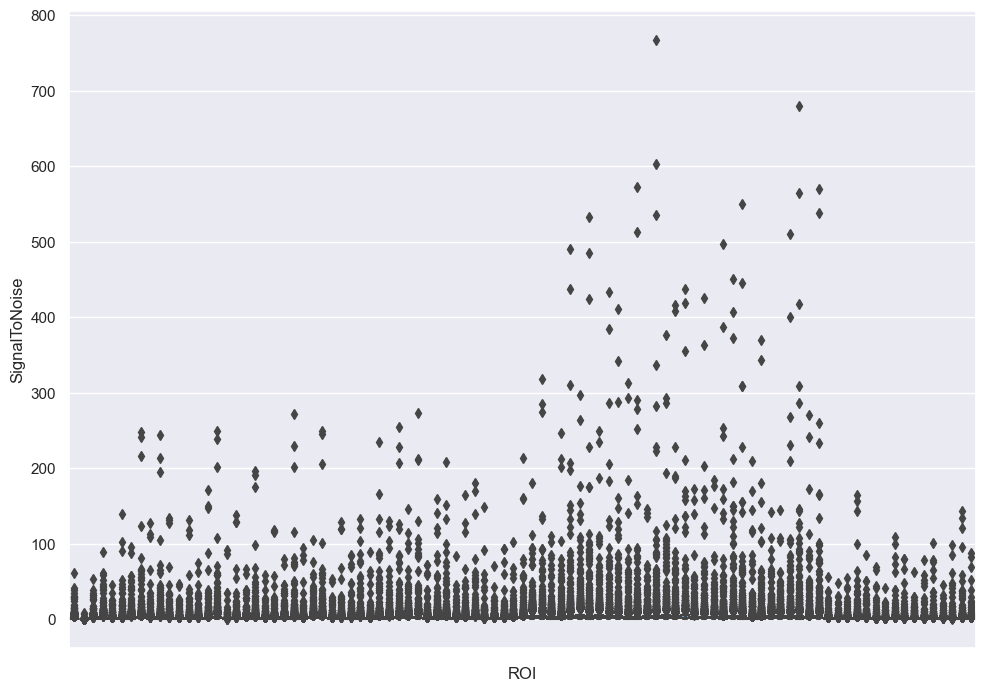

In [326]:
a = seaborn.boxplot(data = sigNoiseDf, x = "ROI", y = "SignalToNoise")


a.set(xticklabels=[]) 

a.show()

In [338]:

targetCountMatrix = pd.read_excel("sunny_bioqc.xlsx", sheet_name = "TargetCountMatrix")

/Users/gabrielf/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


AttributeError: 'AxesSubplot' object has no attribute 'show'

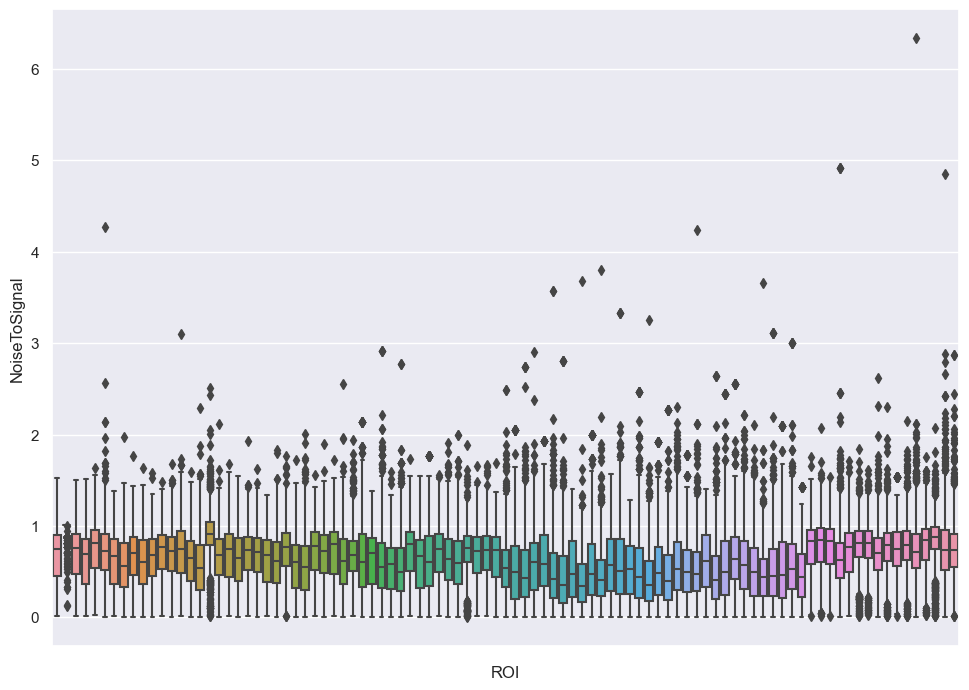

In [330]:
for i in targetCountMatrix.keys():
    
    if i != "TargetName":
        
        targetCountMatrix[i] = targetCountMatrix[i][noiseIndex] / targetCountMatrix[i] 
    
sigNoiseDf = pd.melt(targetCountMatrix, id_vars='TargetName', value_vars=data.keys())

sigNoiseDf = sigNoiseDf.rename(columns = \
                   {"TargetName" : "Gene", "variable": "ROI", "value" : "NoiseToSignal"})

a = seaborn.boxplot(data = sigNoiseDf, x = "ROI", y = "NoiseToSignal")


a.set(xticklabels=[]) 

a.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

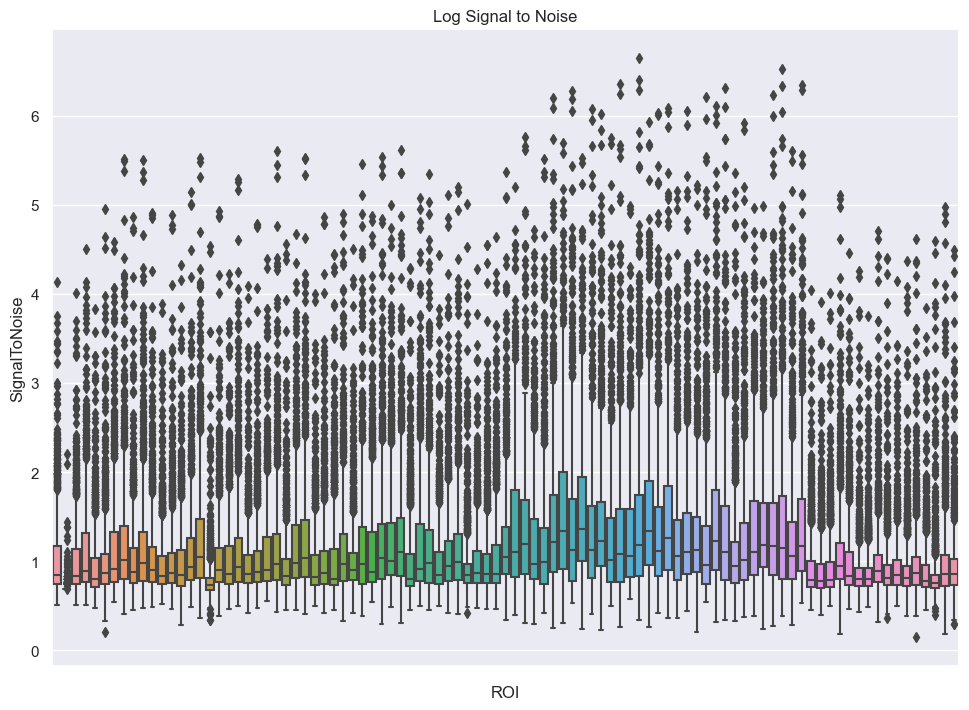

In [ ]:
for i in targetCountMatrix.keys():
    
    if i != "TargetName":
        
        targetCountMatrix[i] = np.log(1+targetCountMatrix[i] / targetCountMatrix[i][noiseIndex])
    
sigNoiseDf = pd.melt(targetCountMatrix, id_vars='TargetName', value_vars=data.keys())

sigNoiseDf = sigNoiseDf.rename(columns = \
                   {"TargetName" : "Gene", "variable": "ROI", "value" : "SignalToNoise"})

a = seaborn.boxplot(data = sigNoiseDf, x = "ROI", y = "SignalToNoise")


a.set(xticklabels=[]) 

a.set(title = "Log Signal to Noise")

a.show()

The plot shows the log signal to noise ratio across all samples. 